# Amazon Web Scraping

In [1]:
import requests
import smtplib # can be used to send emails to oneself, doc: https://docs.python.org/3/library/smtplib.html
import time
import datetime
import csv
from bs4 import BeautifulSoup # doc: https://beautiful-soup-4.readthedocs.io/en/latest/
import pandas as pd
import datetime

In [2]:
url = 'https://www.amazon.in/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64).....",
          "Accept-Encoding": "gzip, deflate",
          "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
          "DNT": "1", "Connection" : "close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url, headers = headers)

In [12]:
page.headers

{'Server': 'Server', 'Content-Type': 'text/html;charset=UTF-8', 'x-amz-rid': 'F36V7QRCHZJEYG91WSHJ', 'Accept-CH': 'ect,rtt,downlink', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1;', 'Accept-CH-Lifetime': '86400', 'Cache-Control': 'no-cache, no-transform, no-transform', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=47474747; includeSubDomains; preload', 'X-Frame-Options': 'SAMEORIGIN', 'Permissions-Policy': 'interest-cohort=()', 'Date': 'Sun, 26 Sep 2021 07:51:07 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'close, Transfer-Encoding', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'session-id=262-6324394-7865632; Domain=.amazon.in; Expires=Mon, 26-Sep-2022 07:51:07 GMT; Path=/; Secure, session-id-time=2082787201l; Domain=.amazon.in; Expires=Mon, 26-Sep-2022 07:51:07 GMT; Path=/; Secure, i18n-prefs=INR; Domain=.amazon.in; Expires=Mon, 26-Sep-2022 07:51:07 GMT; Path=/, lc-acbin=en_IN; Domain=.amazon.in; Expires=Mon, 26-Sep-2022 07:51:07 GMT; Path=/'}

In [13]:
soup_1 = BeautifulSoup(page.content, 'html.parser') # returns all the html
# print(soup_1)

In [14]:
soup_2 = BeautifulSoup(soup_1.prettify(), "html.parser")
# print(soup_2)

In [15]:
# extracting product title
title = soup_2.find(id = 'productTitle').get_text() # refer underlying website html 
print(title) # notice white space


            An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics)
           


In [16]:
print(len(title))
title = title.strip() # notice additional white space, remove
print(len(title))
print(title)

119
94
An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics)


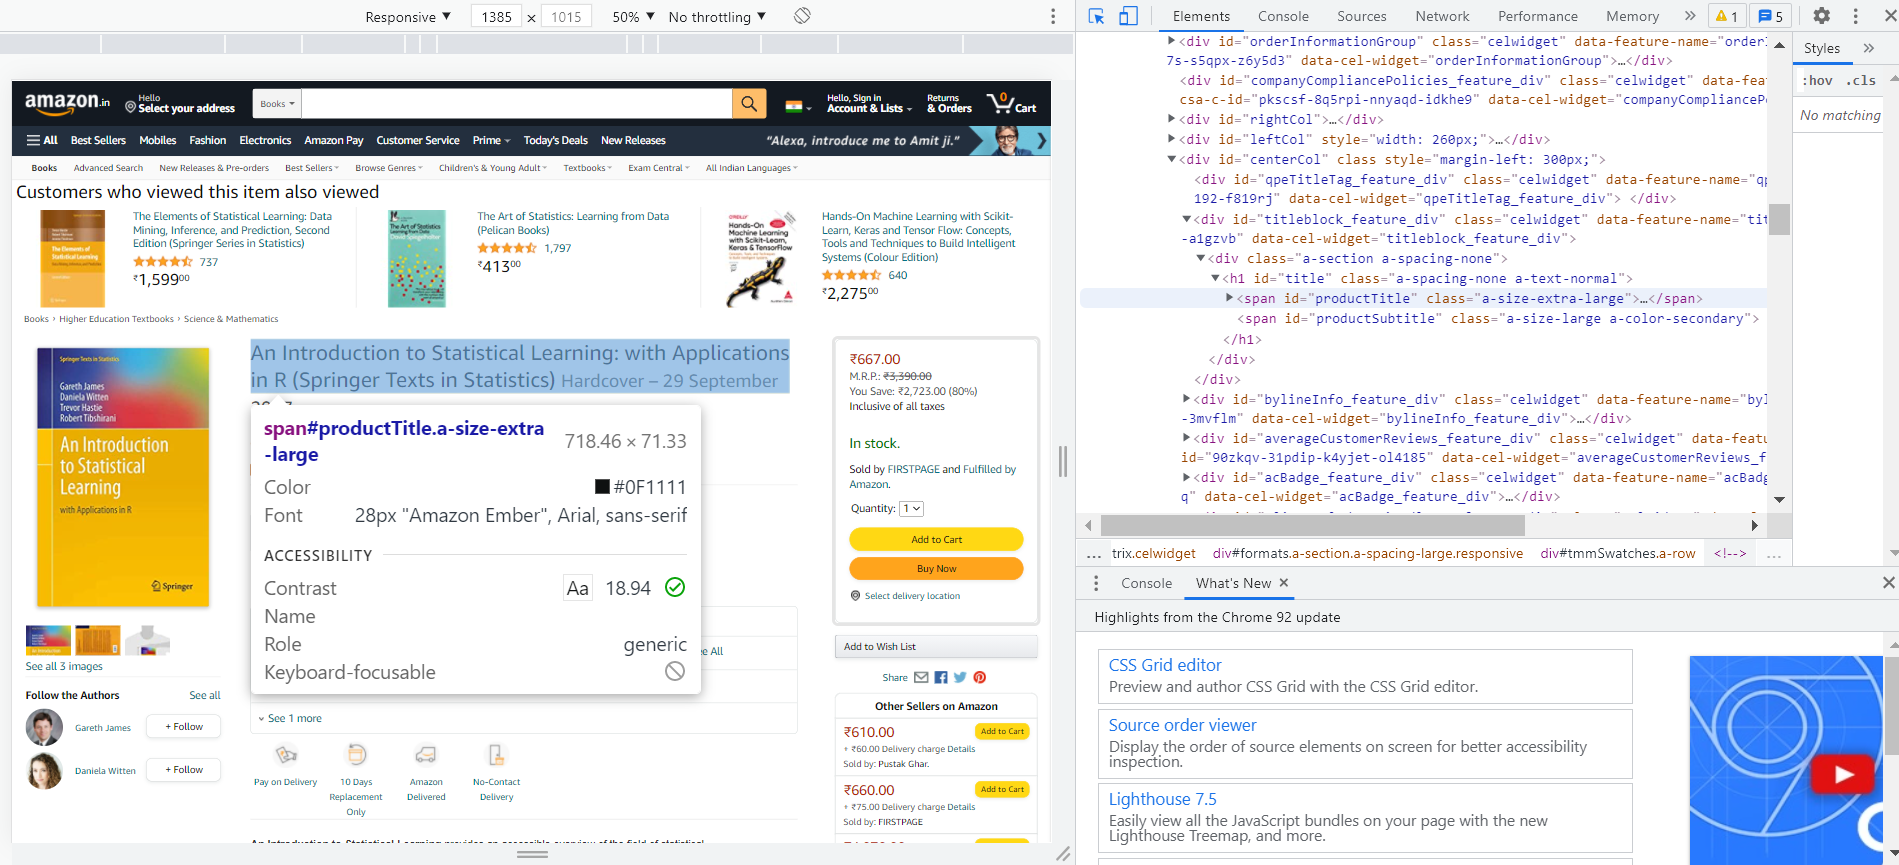

In [17]:
from IPython.display import Image
Image('Screenshot (850).png')

In [18]:
# extracting product price 

price = soup_2.find(id = 'soldByThirdParty').get_text() # refer underlying website html code
print(price) # notice white space

# removing unnecessary white space 
print(len(price))
price = price.strip()
print(len(price))
print(price)



                    ₹600.00
                   


51
7
₹600.00


In [19]:
# extracting product rating 
rating = soup_2.find(id="acrPopover").get_text()
rating
new_rating = ""
for i in rating:
    if i != " ":
        if i != "\n":
            new_rating = new_rating + i            

In [40]:
new_rating

'4.6outof5stars'

In [37]:
rating

'\n\n\n\n\n                4.6 out of 5 stars\n               \n\n\n\n\n\n\n\n'

In [38]:
rating.split()

['4.6', 'out', 'of', '5', 'stars']

In [39]:
rating.split()[0]

'4.6'

In [21]:
# extracting rating (alternate)
for i in range(len(new_rating)):
    if new_rating[i].isalpha():
        alpha_pos = i
        final_rating = new_rating[0:i]
        print(final_rating)
        break
        
final_rating

4.6


'4.6'

In [30]:
today = datetime.date.today()
print(today)

2021-09-26


In [31]:
columns = ['Date', 'Title', 'Price', 'Rating']
data = [today, title, price, final_rating]
# data = pd.Series(data, index = product_deets.columns)
product_deets = pd.DataFrame(columns = columns)
product_deets

,Date,Title,Price,Rating


In [32]:
product_deets.loc[0] = data
product_deets

,Date,Title,Price,Rating
0,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6


In [33]:
with open('AmzWebScarperData.csv', 'w', newline = '', encoding = 'UTF8') as file:
    writer = csv.writer(file)
    writer.writerow(columns) # column names/headers
    writer.writerow(data)

In [107]:
# sending email to notify price drop
def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    
    server.ehlo()
    server.login('xxxx@gmail.com', 'xxxx')
    
    sub = f"WISHLIST ITEM ON SALE: {title.encode('utf-8')}"
    body = f"Jessintha, the price of the item you've been wanting now meets your bargain! It is on sale for {price[1:].encode('utf-8')}!"
    
    message = f'Subject: {sub}\n\n{body}'
    from_ = 'xxxx@gmail.com'
    server.sendmail(from_, 'xxxx@gmail.com', message)

In [108]:
# compiling

def recordPrice():
    url = 'https://www.amazon.in/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370'
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) ",
          "Accept-Encoding": "gzip, deflate",
          "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
          "DNT": "1", "Connection" : "close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url, headers = headers)
    soup_1 = BeautifulSoup(page.content, 'html.parser')
    soup_2 = BeautifulSoup(soup_1.prettify(), "html.parser")
    
    today = datetime.date.today()
    
    title = soup_2.find(id = 'productTitle').get_text()
    title = title.strip()
    
    price = soup_2.find(id = 'soldByThirdParty').get_text()
    price = price.strip()
    
    rating = soup_2.find(id="acrPopover").get_text()
    rating = rating.split()[0]
    
    columns = ['Date', 'Title', 'Price', 'Rating']
    data = [today, title, price, rating]
    
    with open('AmzWebScarperData.csv', 'a+', newline = '', encoding = 'UTF8') as file:
        writer = csv.writer(file)
        writer.writerow(data)    
        
        
    # sending emails
    if (float(price[1:]) <= 600):
        send_mail()
    

In [109]:
# automating 
while(True):
    recordPrice()
    time.sleep(5) # runs the function every 5 seconds 
#     time.sleep(86400) # runs once every day

KeyboardInterrupt: 

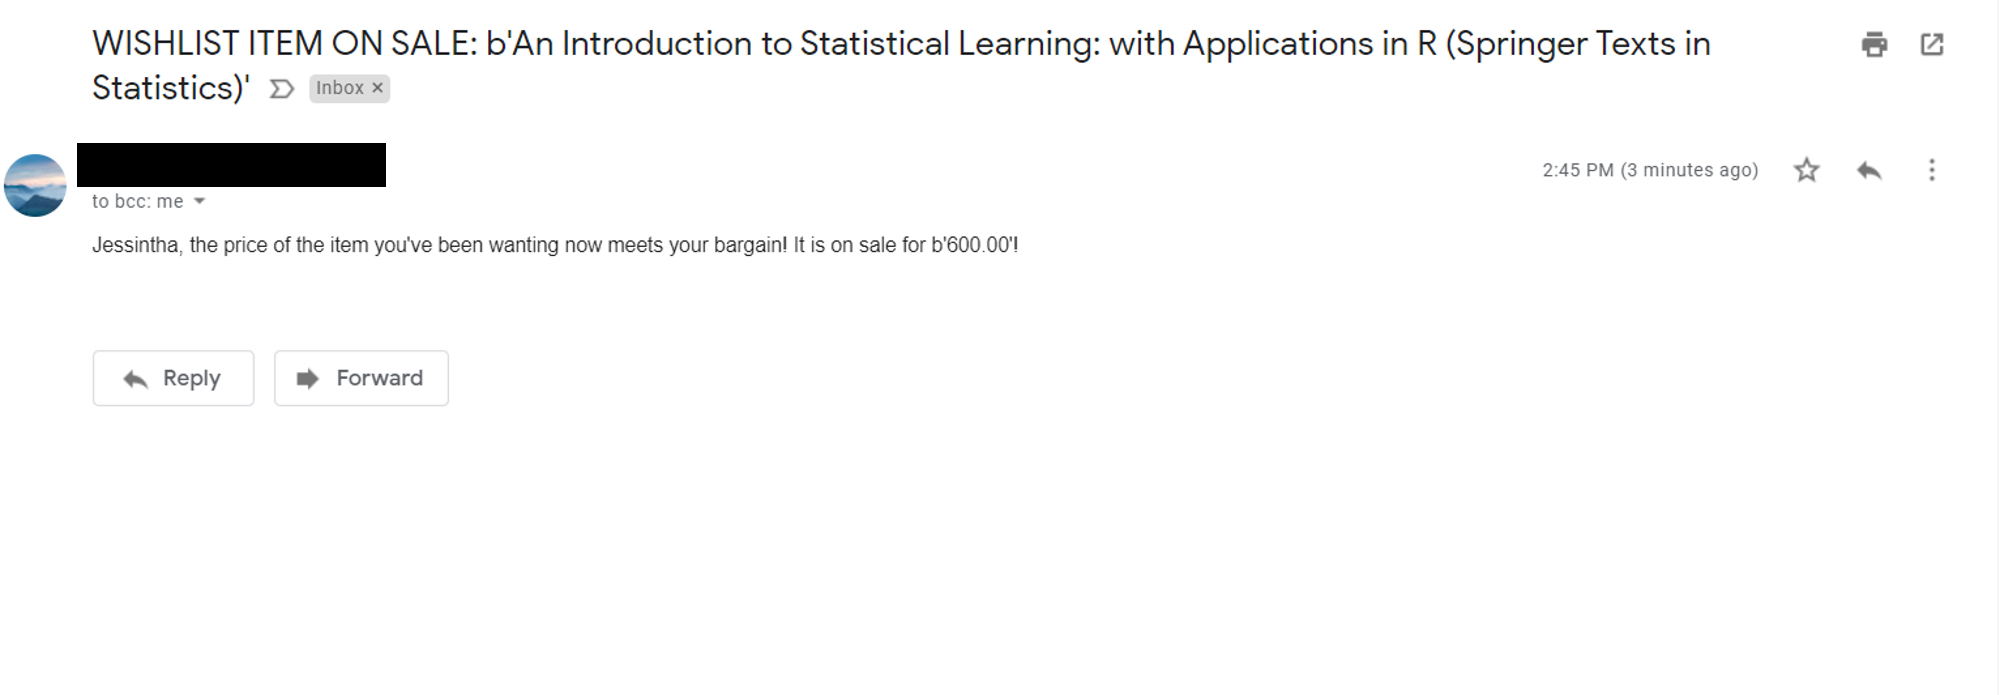

In [3]:
from IPython.display import Image
Image('Email Screenshot.png')

In [111]:
df = pd.read_csv('AmzWebScarperData.csv')
df.head()

,2021-09-26,An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics),₹600.00,4.6
0,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6
1,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6
2,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6
3,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6
4,2021-09-26,An Introduction to Statistical Learning: with ...,₹600.00,4.6
